## 1. Vorbereitung

Der letzte Schritt, der uns noch fehlt, ist das *Trainieren* eines Modells. Bislang sind wir stets von fertigen Modellen ausgegangen, die uns aus zum Teil unbekannter Quelle zugekommen sind. Wir sind davon ausgegangen, dass diese Modelle angemessen funktionieren und habe diese evaluiert und zur Vorhersage genutzt.

Wir beschäftigen uns wieder mit den Daten der vorherigen Lektionen, das heißt `house_location_data.csv` und `house_location_new_data_with_labels.csv`.

In [60]:
# TODO: Importieren der Daten mit Pandas
import pandas as pd

data = pd.read_csv("../data/house_location/house_location_data.csv")
data_new = pd.read_csv("../data/house_location/house_location_new_data_with_labels.csv")

In [5]:
data

,id,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,4096,1,3.0,2.0,1495000,1927,1520,984,105
1,2954,0,1.0,2.0,1950000,1900,1300,1500,7
2,4887,1,5.0,3.5,2995000,1947,3890,770,181
3,9980,1,2.0,1.0,759900,1941,1175,647,43
4,9892,0,3.0,2.0,7350000,1999,2075,3542,23
...,...,...,...,...,...,...,...,...,...
388,4227,0,2.0,2.0,2025000,1940,1433,1413,21
389,2384,0,2.0,2.0,1675000,2006,1225,1367,12
390,3085,0,4.0,5.0,12000000,1939,3700,3243,22
391,8296,1,0.0,1.0,499000,1900,510,978,91


In [6]:
data_new

,id,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,8268,0,1.0,1.0,399000,1910,475,840,14
1,2271,1,2.0,2.0,849000,1911,1100,772,66
2,5122,1,3.0,2.5,1300000,1975,1642,792,4
3,2778,0,2.0,2.0,3995000,1906,2400,1665,9
4,4960,1,5.0,3.5,3995000,1905,3350,1193,59
...,...,...,...,...,...,...,...,...,...
94,2127,0,1.0,1.0,515000,1962,725,710,10
95,3137,1,1.0,1.0,699000,1907,932,750,59
96,5467,1,2.0,1.0,550000,1908,800,688,43
97,6099,1,4.0,1.0,1050000,1932,1767,594,55


## 2. Modell trainieren

Zuvor haben wir ein fertiges Modell benutzt, nun wollen wir dieses selbstständig *trainieren*, das heißt an die Daten anpassen, sodass dieses hoffentlich korrekte Vorhersagen trifft.


### 2.1. Dummy Modell

Wir trainieren zunächst ein Modell auf Grundlage einer äußerst simplen Annahme: wir identifizieren einfach dasjenige Feature im Datensatz, das sich zwischen den Klassen (*New York* vs *San Francisco*) am stärksten unterscheidet. Für dieses Feature bestimmen wir einen Schwellenwert anhand dessen wir jeweils entscheiden wollen, ob ein Datenpunkt der Klasse *New York* oder *San Francisco* angehört.

In [5]:
# TODO: Dummy-Modell trainieren

In [20]:
data_in_sf = data.loc[data.in_sf.values == 1, :]
data_in_ny = data.loc[data.in_sf.values == 0, :]

In [21]:
data_in_ny

,id,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
1,2954,0,1.0,2.0,1950000,1900,1300,1500,7
4,9892,0,3.0,2.0,7350000,1999,2075,3542,23
7,9866,0,3.0,3.0,6350000,2015,2500,2540,3
8,3180,0,1.0,1.0,650000,1907,720,903,32
14,3096,0,1.0,1.0,925000,1985,745,1242,10
...,...,...,...,...,...,...,...,...,...
378,4340,0,1.0,1.0,1550000,1926,1000,1550,6
382,2708,0,2.0,2.0,1200000,1964,1200,1000,10
388,4227,0,2.0,2.0,2025000,1940,1433,1413,21
389,2384,0,2.0,2.0,1675000,2006,1225,1367,12


In [22]:
data_in_sf

,id,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,4096,1,3.0,2.0,1495000,1927,1520,984,105
2,4887,1,5.0,3.5,2995000,1947,3890,770,181
3,9980,1,2.0,1.0,759900,1941,1175,647,43
5,4738,1,2.0,2.0,2000000,1925,1518,1318,50
6,7910,1,4.0,2.0,1099000,1962,1267,867,69
...,...,...,...,...,...,...,...,...,...
385,8145,1,4.0,2.0,689000,1951,1473,468,21
386,4932,1,2.0,2.0,879000,1912,950,925,53
387,6737,1,1.0,1.0,798000,1926,769,1038,10
391,8296,1,0.0,1.0,499000,1900,510,978,91


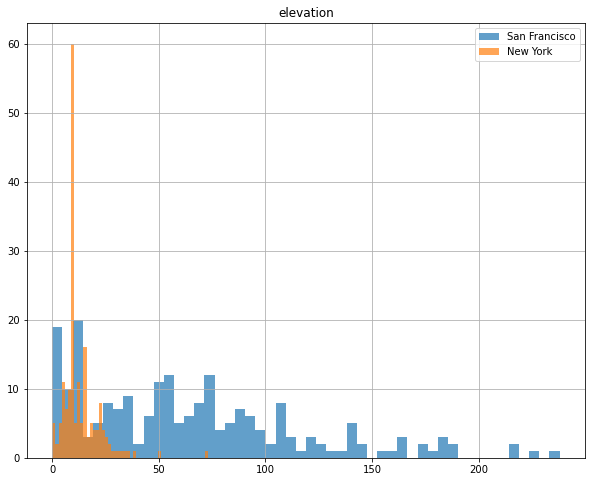

In [29]:
feature = "elevation"

import matplotlib.pyplot as plt

ax = data_in_sf.hist(feature, figsize=(10, 8), bins=50, alpha=0.7, label="San Francisco")
data_in_ny.hist(feature, bins=50, ax=ax, alpha=0.7, label="New York")
plt.legend()

In [34]:
average_elevation_sf = data_in_sf[feature].mean()
average_elevation_ny = data_in_ny[feature].mean()

print(average_elevation_sf)
print(average_elevation_ny)

64.22429906542057
13.23463687150838


In [36]:
decision_value = (average_elevation_ny + average_elevation_sf) / 2
decision_value

38.729467968464476

### 2.2. Scikit-Learn

Im vorherigen Teil haben wir ein sehr einfaches Modell sebst programmiert. Trotz dessen Schlichtheit erfüllt dieses alle Kriterien eines Machine Learning Modells.

Wir können aber natürlich einen Schritt weiter gehen. In den allermeisten Fällen programmieren wir Modelle nicht selbst, sondern greifen auf eine Bibliothek zurück. Diese heißt **Scikit-Learn** und stellt bereits die allermeisten Arten von Modellen zur Verfügung, die uns interessieren (alle außer Neuronale Netzwerke).

Jedes dieser möglichen Modelle funktioniert anders und basiert auf anderen theoretischen Annahmen. Wir werden viele dieser Modelle ausführlich kennenlernen und deren Vorteile, Nachteile und Anwendungsmöglichkeiten diskutieren. Für den Moment benutzen wir schlicht ein bereits bekanntes Modell - den `DecisionTreeClassifier`.

In [102]:
# TODO: DecisionTreeClassifier aus Scikit-Learn importieren
# TODO: DecisionTreeClassifier auf den Daten trainieren
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# Features
X = data.drop(columns=["id", "in_sf"])
# Labels
y = data.in_sf

# Fit
# - X muss ein array-like mit 2 Achsen (Zeilen und Spalten) sein
# - y muss ein array-like mit 1 Achse sein, quasi ein Vektor,
#   gleiche Länge wie die Anzahl der Zeilen in X
model.fit(X, y)

DecisionTreeClassifier(max_depth=10)

## 3. Vorhersagen treffen

Wir treffen eine Vorhersage auf den Daten des Datensatzes `house_location_new_data_with_labels.csv`.

### 3.1. Dummy-Modell

In [67]:
# TODO: Vorhersagen treffen
in_sf_predicted = (data_new[feature].values > decision_value).astype(int)
in_sf_predicted

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0])

### 3.2. Scikit-Learn

In [68]:
X_new = data_new.drop(columns=["id", "in_sf"])

in_sf_predicted_sklearn = model.predict(X_new)
in_sf_predicted_sklearn

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0])

## 4. Modell evaluieren

Da wir wiederum für alle Datenpunkte des Datensatzes `house_location_new_data_with_labels.csv` die richtige Antwort kennen, können wir die Vorhersage des Modells mit diesen richtigen Antworten abgleichen und so eine Einschätzung gewinnen, ob das Modell funktioniert. Die dafür verwendete Metrik ist wieder die *Genaugikeit* oder *Accuracy* oder *Korrekte-Klassifikations-Rate* und soll den Prozentsatz erfassen, zu dem das Modell korrekte Vorhersagen liefert.

In [55]:
# TODO: Vorhersage mit der richtigen Antwort abgleichen
in_sf_true = data_new.in_sf.values
in_sf_true

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [54]:
accuracy = (in_sf_predicted == in_sf_true).sum() / len(in_sf_true)
accuracy

0.7878787878787878

In [73]:
accuracy_sklearn = (in_sf_predicted_sklearn == in_sf_true).sum() / len(in_sf_true)
accuracy_sklearn

0.8888888888888888